In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
import numpy as np
import os
import itertools
import numpy as np
from PIL import Image, ImageFile

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
Training_path = '/content/drive/MyDrive/MultiOFF_Dataset/Split Dataset/Training_meme_dataset.csv'
Validation_path = '/content/drive/MyDrive/MultiOFF_Dataset/Split Dataset/Validation_meme_dataset.csv'
Testing_path = '/content/drive/MyDrive/MultiOFF_Dataset/Split Dataset/Testing_meme_dataset.csv'
img_dir = '/content/drive/MyDrive/MultiOFF_Dataset/Labelled Images'

#PreProcessing

In [ ]:
STOPWORDS = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
EMAIL = re.compile('^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})$')

In [ ]:
def clean_text(text):
    text = text.lower()
    text = EMAIL.sub('', text)
    text = REPLACE_BY_SPACE_RE.sub(' ',text)
    text = BAD_SYMBOLS_RE.sub('',text)    
    text = text.replace('x','')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    
    return text

In [ ]:
def encode_label(DataFrame, Label_col):
    t_y = DataFrame[Label_col].values
    Encoder = LabelEncoder()
    y = Encoder.fit_transform(t_y)
    DataFrame[Label_col] = y

In [ ]:
def preprocess_text(Training_path,Validation_path, Testing_path):
    # function to preprocess input
    training_DF = pd.read_csv(Training_path, sep = ',')
    validation_DF = pd.read_csv(Validation_path, sep = ',')
    testing_DF = pd.read_csv(Testing_path, sep = ',')

    # encoding all the labels 
    encode_label(testing_DF,'label')
    encode_label(training_DF, 'label')
    encode_label(validation_DF, 'label')

    clean_text(training_DF['sentence'][0])

    # Processing the text
    training_DF['sentence'] = training_DF['sentence'].apply(clean_text)
    testing_DF['sentence'] = testing_DF['sentence'].apply(clean_text)
    validation_DF['sentence'] = validation_DF['sentence'].apply(clean_text)

    return training_DF, testing_DF, validation_DF

In [ ]:
training_DF, testing_DF, validation_DF = preprocess_text(Training_path,Validation_path, Testing_path)

In [ ]:
print(len(training_DF))
print(len(validation_DF))
print(len(testing_DF))

445
149
149


In [ ]:
training_DF.head()

,image_name,sentence,label
0,LJ3r8Gy.jpg.png,official bernie sanders drinking game every ti...,0
1,qDnIIHA.png,228 pm wall inside nazi gas chamber dwebs demo...,1
2,1JQk5NF.png,shit waddup bernie sanders com,1
3,iMMNq.png,mitt romney worst republican country putup bar...,0
4,jAi3iI1.png,anonymous id duqda1io 08 05 16 fri 163248 8423...,0


#Code

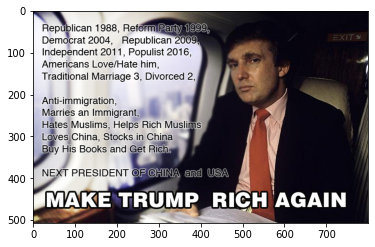

In [ ]:
#Sample Meme
img_id='pvCTAHi.png'
path = '/content/drive/MyDrive/MultiOFF_Dataset/Labelled Images/'
path1=path+img_id
img = plt.imread(path1,0)
plt.imshow(img)
plt.show()

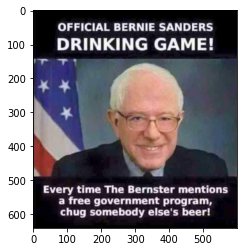

In [ ]:
#Sample Meme
img_id='LJ3r8Gy.jpg.png'
path = '/content/drive/MyDrive/MultiOFF_Dataset/Labelled Images/'
path1=path+img_id
img = plt.imread(path1,0)
plt.imshow(img)
plt.show()

In [ ]:
sentences_train= training_DF['sentence'].values
sentences_test = testing_DF['sentence'].values
sentences_val = validation_DF['sentence'].values

In [ ]:
Encoder = LabelEncoder()

In [ ]:
y_train= training_DF['label'].values
y_train = Encoder.fit_transform(y_train)

y_test= testing_DF['label'].values
y_test = Encoder.fit_transform(y_test)

y_val= validation_DF['label'].values
y_val = Encoder.fit_transform(y_val)

In [ ]:
onepercentage=((y_train.sum())/(y_train.shape[0]))*100
print(onepercentage)  #Positive Label

42.02247191011236


In [ ]:
for i in sentences_train:
  print(i)

official bernie sanders drinking game every time bernster mentions free government program chug somebody else beer
228 pm wall inside nazi gas chamber dwebs democrat mentions gun control remember picture
shit waddup bernie sanders com
mitt romney worst republican country putup barack obama endorse mitt romney
anonymous id duqda1io 08 05 16 fri 163248 84231555 84231620 84231654 84231659 84231689 84231698 2 84231735 84231790 84231867 84231910 84232021 84232120 84232180 84232228 84232342 84232377 84232671 84232765 84232970 file image jpg 92 kb 740547 repeating digits pass away getting witness trump vs hillary debate
kle watching dem debate hell yeah bernie hillary avoiding questions stahp hillary fucking stop swear fucking god hillary answer god damn question stop avoiding topic actually fucking debate ali
trump isanasshole hillary isaliar iiwishicould vote negroagain
nt cop problem america problem cops sure black america cop problem cops neighborhood neighborhood liberal democrat problem

In [ ]:
print(y_train)

[0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1
 1]


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train) # converting sentences into vectors

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_val = vectorizer.transform(sentences_val)

#Predictions

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

##Logistic Regression

In [ ]:
classifier = LogisticRegression()
# Training classifier 
classifier.fit(X_train, y_train)
# Performace Metric Accuracy 
acc_log = classifier.score(X_val, y_val)*100
print("Accuracy:", acc_log)

Accuracy: 65.77181208053692


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
final_score = precision_recall_fscore_support(y_test, y_pred, beta=1.0, labels=None, pos_label=1, average='binary')
print("Precision:",final_score[0])
print("Recall:",final_score[1])
print("F Score:",final_score[2])

Precision: 0.5
Recall: 0.29310344827586204
F Score: 0.3695652173913043


##Support Vector Classification

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
acc_svc = svc.score(X_val, y_val)*100
print("Accuracy:", acc_svc)

Accuracy: 61.74496644295302


In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
final_score = precision_recall_fscore_support(y_test, y_pred, beta=1.0, labels=None, pos_label=1, average='binary')
print("Precision:",final_score[0])
print("Recall:",final_score[1])
print("F Score:",final_score[2])

Precision: 0.75
Recall: 0.05172413793103448
F Score: 0.0967741935483871


##Naive Bayes

In [ ]:
from sklearn import naive_bayes
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
# Use accuracy_score function to get the accuracy
acc_naive = Naive.score(X_val, y_val)*100
print("Accuracy:",acc_naive)

Accuracy: 61.74496644295302


In [ ]:
y_pred = Naive.predict(X_test)

In [ ]:
final_score = precision_recall_fscore_support(y_test, y_pred, beta=1.0, labels=None, pos_label=1, average='binary')
print("Precision:",final_score[0])
print("Recall:",final_score[1])
print("F Score:",final_score[2])

Precision: 0.5111111111111111
Recall: 0.39655172413793105
F Score: 0.44660194174757284


##KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
acc_knn = knn.score(X_val, y_val)*100
print("Accuracy:",acc_knn)

Accuracy: 56.375838926174495


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
final_score = precision_recall_fscore_support(y_test, y_pred, beta=1.0, labels=None, pos_label=1, average='binary')
print("Precision:",final_score[0])
print("Recall:",final_score[1])
print("F Score:",final_score[2])

Precision: 0.525
Recall: 0.3620689655172414
F Score: 0.42857142857142855


##SGD Classifier

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
acc_sgd = sgd.score(X_val, y_val)*100
print("Accuracy:",acc_sgd)

Accuracy: 60.40268456375839


In [ ]:
y_pred = sgd.predict(X_test)

In [ ]:
final_score = precision_recall_fscore_support(y_test, y_pred, beta=1.0, labels=None, pos_label=1, average='binary')
print("Precision:",final_score[0])
print("Recall:",final_score[1])
print("F Score:",final_score[2])

Precision: 0.42105263157894735
Recall: 0.27586206896551724
F Score: 0.3333333333333333


##Decision Tree Classifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = decision_tree.score(X_val, y_val)*100
print("Accuracy:",acc_decision_tree)

Accuracy: 59.73154362416108


In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
final_score = precision_recall_fscore_support(y_test, y_pred, beta=1.0, labels=None, pos_label=1, average='binary')
print("Precision:",final_score[0])
print("Recall:",final_score[1])
print("F Score:",final_score[2])

Precision: 0.5526315789473685
Recall: 0.3620689655172414
F Score: 0.4375


##Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
acc_random_forest = random_forest.score(X_val, y_val)*100
print("Accuracy:",acc_random_forest)

Accuracy: 63.08724832214765


In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
final_score = precision_recall_fscore_support(y_test, y_pred, beta=1.0, labels=None, pos_label=1, average='binary')
print("Precision:",final_score[0])
print("Recall:",final_score[1])
print("F Score:",final_score[2])

Precision: 0.5714285714285714
Recall: 0.13793103448275862
F Score: 0.2222222222222222


##Linear **SVC**

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
acc_linear_svc = linear_svc.score(X_val, y_val)*100
print("Accuracy:",acc_linear_svc)

Accuracy: 63.08724832214765


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
y_pred = linear_svc.predict(X_test)

In [ ]:
final_score = precision_recall_fscore_support(y_test, y_pred, beta=1.0, labels=None, pos_label=1, average='binary')
print("Precision:",final_score[0])
print("Recall:",final_score[1])
print("F Score:",final_score[2])

Precision: 0.5333333333333333
Recall: 0.41379310344827586
F Score: 0.4660194174757281


#Model Evaluation

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_naive, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,65.771812
3,Random Forest,63.087248
6,Linear SVC,63.087248
0,Support Vector Machines,61.744966
4,Naive Bayes,61.744966
5,Stochastic Gradient Decent,60.402685
7,Decision Tree,59.731544
1,KNN,56.375839
